비지도 학습 : 머신러닝의 미래, 언제 어디서나 사용 가능
- 입력데이터(X)만 존재 ,출력(Y) 없음

In [2]:
#p221 10개의 숫자 이미지 OCR(optical광학 characer글자 recognization 인식)
#비지도 학습으로 숫자 인식을 할 수 있습니다.

In [3]:
#221
from sklearn.datasets import load_digits #digits숫자

In [4]:
digits = load_digits()

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.target.shape #Y예측 목표(타겟)

(1797,)

In [8]:
digits.images.shape

(1797, 8, 8)

In [11]:
import matplotlib.pyplot as plt

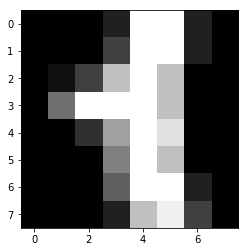

In [17]:
plt.imshow(digits.images[21],cmap='gray')

In [25]:
#221 64개의 명암값을 2개로 차원축소해서 2차원 그래프에 산점도로 그려봅니다.
from sklearn.decomposition import PCA
import mglearn

In [22]:
pca = PCA(n_components=2).fit(digits.data) # 64차원을 2차원으로 축소


In [24]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

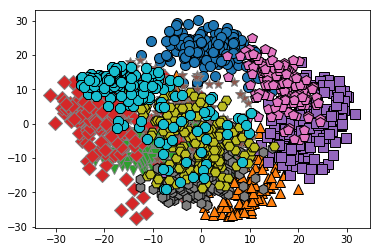

In [26]:
l = mglearn.discrete_scatter(pca_x[:,0],pca_x[:,1],digits.target)

In [28]:
#p223
from sklearn.manifold import TSNE

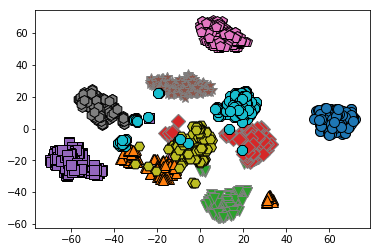

In [30]:
digits_tsne = TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1],digits.target)

#p225 군집(clustering) - 비슷한 데이터끼리 묶어준다 - 분류, 이상치 검출(Abnormal Detection)
- k-평균 군집
- 병합군집
- DBSCAN (density based spatial clustering application noise) 밀도가 높은 공간

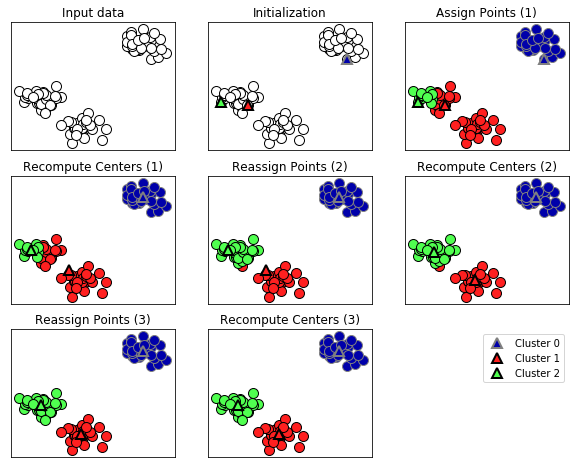

In [108]:
mglearn.plots.plot_kmeans_algorithm()

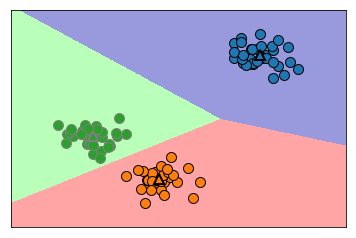

In [109]:
mglearn.plots.plot_kmeans_boundaries()

In [117]:
from sklearn.datasets import make_blobs
x, y = make_blobs() # 연습용 데이터네
x.shape, y.shape

((100, 2), (100,))

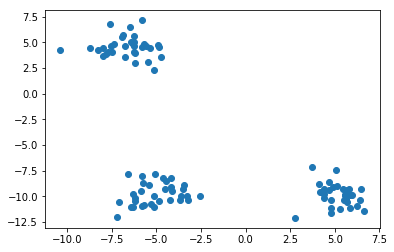

In [118]:
plt.scatter(x[:,0],x[:,1])

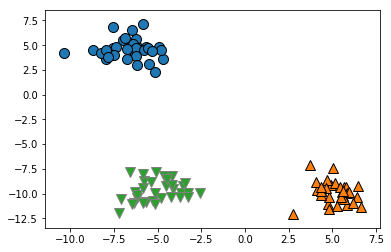

In [119]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], y)

In [120]:
from sklearn.cluster import KMeans

In [121]:
km = KMeans(n_clusters=3).fit(x) # k를 3개로 그룹하(cluster)

In [122]:
km.predict(x) # x가 몇번째 그룹이니?

array([0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2])

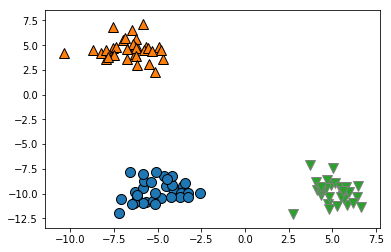

In [124]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], km.predict(x))

digit에 적용해보세요
- t-SNE로 2개의 차원으로 축소합니다.
- 그 데이터로 k-Means를 fit합니다.
- k-means의 예측을 산점도에서 표시합니다.

In [125]:
km2 = KMeans(n_clusters=10).fit(digits_tsne)

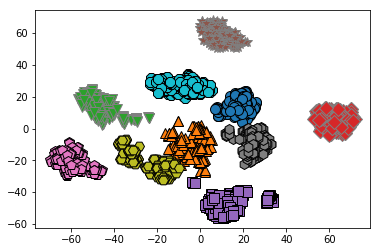

In [129]:
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1], km2.predict(digits_tsne))

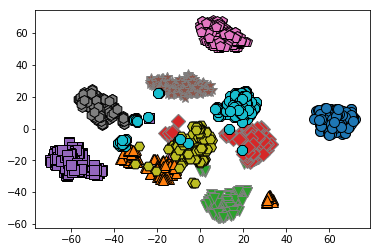

In [130]:
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1],digits.target)

In [196]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

머신러닝 저장소 - 3위 와인 데이터
와인의 질, 컬러 알콜 도수 등을 측정 -> 원산지 (3군데)를 추정하는 문제

In [188]:
import pandas as pd

In [189]:
df = pd.read_csv('wine.data', header=None)

In [190]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [191]:
df.columns = ['Origin','Alcohol','Malic acid','Ash','Alcalinity of ash',
'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [192]:
df.head()

,Origin,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [193]:
df2 = df.iloc[:,1:]
df2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [194]:
pca = PCA(n_components=2).fit(df2)
df3 = pca.transform(df2)
df3.shape

(178, 2)

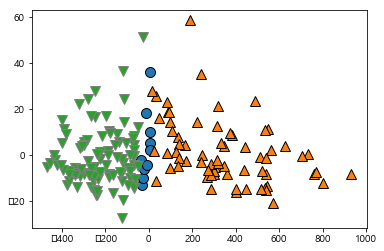

In [195]:
km3 = KMeans(n_clusters=3).fit(df3)
l = mglearn.discrete_scatter(df3[:,0],df3[:,1], km.predict(df3))

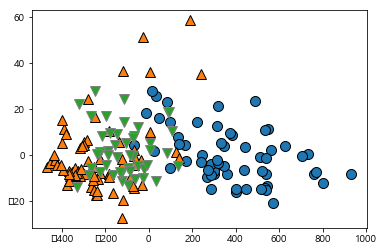

In [198]:
km3 = KMeans(n_clusters=3).fit(df3)
l = mglearn.discrete_scatter(df3[:,0],df3[:,1], df.iloc[:,0])

In [151]:
url = 'file:///C:/Users/wtime/Downloads/KBReport%20_%20%ED%95%9C%EA%B5%AD%20%ED%94%84%EB%A1%9C%EC%95%BC%EA%B5%AC%20%ED%86%B5%EA%B3%84%20%EC%82%AC%EC%9D%B4%ED%8A%B8.html'
tables = pd.read_html(url)
tables[0], len(tables)

(   순위    팀명   승  무   패     승률   게임차   득점   실점  연속
 0   1    SK  59  1  29  0.670   0.0  441  342  2패
 1   2    두산  54  0  36  0.600   6.0  440  346  2승
 2   3  Hero  54  0  37  0.593   6.5  500  387  4승
 3   4    LG  49  1  38  0.563   9.5  377  377  1패
 4   5    NC  42  1  44  0.488  16.0  409  415  2패
 5   6    KT  42  1  47  0.472  17.5  407  456  1패
 6   7    삼성  37  1  49  0.430  21.0  400  424  2승
 7   8   KIA  36  1  52  0.409  23.0  401  467  2패
 8   9    한화  34  0  53  0.391  24.5  388  449  1승
 9  10    롯데  32  2  54  0.372  26.0  407  507  1승, 7)

In [152]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [153]:
baseball = tables[0]

In [154]:
baseball

,순위,팀명,승,무,패,승률,게임차,득점,실점,연속
0,1,SK,59,1,29,0.670,0.0,441,342,2패
1,2,두산,54,0,36,0.600,6.0,440,346,2승
2,3,Hero,54,0,37,0.593,6.5,500,387,4승
3,4,LG,49,1,38,0.563,9.5,377,377,1패
4,5,NC,42,1,44,0.488,16.0,409,415,2패
5,6,KT,42,1,47,0.472,17.5,407,456,1패
6,7,삼성,37,1,49,0.430,21.0,400,424,2승
7,8,KIA,36,1,52,0.409,23.0,401,467,2패
8,9,한화,34,0,53,0.391,24.5,388,449,1승
9,10,롯데,32,2,54,0.372,26.0,407,507,1승


In [155]:
base = baseball.set_index('팀명')

In [156]:
base

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패
KT,6,42,1,47,0.472,17.5,407,456,1패
삼성,7,37,1,49,0.430,21.0,400,424,2승
KIA,8,36,1,52,0.409,23.0,401,467,2패
한화,9,34,0,53,0.391,24.5,388,449,1승


In [157]:
base.dtypes

순위       int64
승        int64
무        int64
패        int64
승률     float64
게임차    float64
득점       int64
실점       int64
연속      object
dtype: object

In [161]:
data = base.drop(columns='연속')
data.shape

(10, 8)

In [162]:
#2차원으로 변환한 후 k계로 클러스터링
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [166]:
#k-means로 클러ㅡ터링
km = KMeans(n_clusters=3).fit(data_pca)

In [167]:
data_pca[:,0]

array([-82.63008057, -76.0355584 , -61.14104127, -23.55138709,
         1.57645744,  39.6385485 ,  15.20972192,  54.18601309,
        43.57464041,  89.17268597])

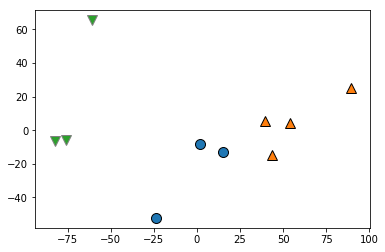

In [168]:
l = mglearn.discrete_scatter(data_pca[:,0],data_pca[:,1], km.predict(data_pca))

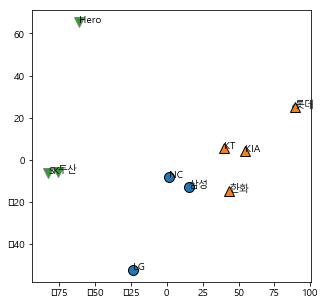

In [170]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,5))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(),data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i])
plt.scatter(data_pca[i,0], data_pca[i,1])
l = mglearn.discrete_scatter(data_pca[:,0],data_pca[:,1], km.predict(data_pca))

### 대출 상환 여부
1. get_dummy()로 purpose 원핫 인코딩
1. PCA로 2차원으로 축소
1. K-Mean(2개)로 그룹화
1. 산점도로 출력

In [199]:
loans = pd.read_csv('loans.csv')

In [201]:
loans_hot = pd.get_dummies(loans.dropna())

In [202]:
pca = PCA(n_components=2).fit(loans_hot)
x_pca = pca.transform(loans_hot) #주성분 2개 추출
km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
group = km.predict(x_pca)

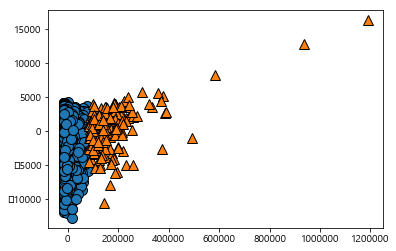

In [203]:
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], group) # 예측

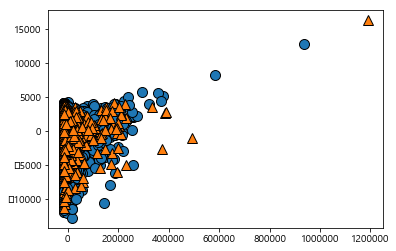

In [207]:
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],loans.dropna().iloc[:,-1]) #실제로 돈 안값는 사람